# ``eBOSS`` Quasar Luminosity Function

Initiate notebook.

In [1]:
from pprint import pprint

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from astropy.cosmology import Planck15
from mpl_toolkits import mplot3d

from conf import PATH
from horizonground.lumfunc_likelihood import LumFuncMeasurements
from horizonground.lumfunc_modeller import (
    LumFuncModeller,
    quasar_PLE_model,
    quasar_hybrid_model,
)

Define parameter ranges.

In [2]:
REDSHIFT_RANGE = 0., 3.
MAGNITUDE_RANGE = -29.0, -20.6
DENSITY_RANGE = pow(10, -9.225), pow(10, -4.775)

## ``eBOSS`` QSO luminosity function data

Load luminosity function data in redshift bins.

In [3]:
MEASUREMENTS_FILE = PATH/"external"/"eBOSS_QSO_LF_measurements.txt"
UNCERTAINTIES_FILE = PATH/"external"/"eBOSS_QSO_LF_uncertainties.txt"

luminosity_function_data = LumFuncMeasurements(
    MEASUREMENTS_FILE, UNCERTAINTIES_FILE, base10_log=False
)

## QSO luminosity function model

Specify luminosity function model.

In [4]:
modeller = LumFuncModeller.from_parameters_file(
    parameter_file="../data/external/eBOSS_QSO_LF_PLE_model_fits.txt",
    lumfunc_model=quasar_PLE_model,
    brightness_variable='magnitude',
    threshold_value=-21.80,
    threshold_variable='magnitude',
    cosmology=Planck15,
    base10_log=False,
)

luminosity_function_model = modeller.luminosity_function

Visualise luminosity function surface.

Text(0.5, 0, '$\\Phi(m,z)$ [$\\textrm{Mpc}^{-3} \\textrm{mag}^{-1}$]')

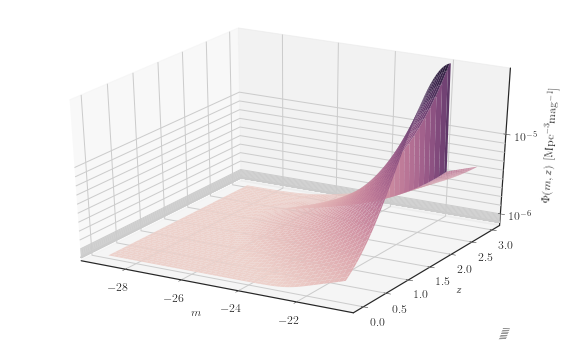

In [5]:
NUM_MESH = 100

magnitudes = np.linspace(*MAGNITUDE_RANGE, num=NUM_MESH, endpoint=False)
redshifts = np.linspace(*REDSHIFT_RANGE, num=NUM_MESH, endpoint=False)
m, z = np.meshgrid(magnitudes, redshifts)
Phi = luminosity_function_model(m, z)

fig = plt.figure("Luminosity function surface", figsize=(10, 6))
ax = plt.axes(projection='3d')

ax.plot_surface(
    m, z, Phi,
    cmap=sns.cubehelix_palette(as_cmap=True),
    edgecolor='none'
)

ax.set_xlabel(r"$m$")
ax.set_ylabel(r"$z$")

ax.set_zlim(*DENSITY_RANGE)
ax.set_zscale('log')
ax.set_zticks([pow(10, -5), pow(10, -6)])
ax.set_zlabel(r"$\Phi(m,z)$ [$\textrm{Mpc}^{-3} \textrm{mag}^{-1}$]")

## ``eBoss`` QSO luminosity function results

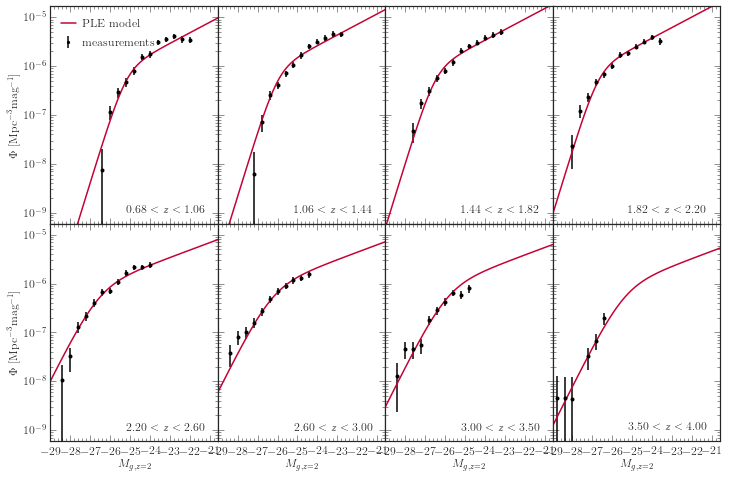

In [6]:
NUM_INTERVALS = 100

NUM_ROW, NUM_COL = 2, 4
ROW_SPAN, COL_SPAN = 4, 3

LEGEND_SETTINGS = dict(
    loc='upper left',
    handlelength=1.2, 
    handletextpad=0.5
)

m = np.linspace(*MAGNITUDE_RANGE, num=NUM_INTERVALS+1)

magnitude_bins = luminosity_function_data.brightness_bins
redshift_bins = luminosity_function_data.redshift_bins
redshift_labels = luminosity_function_data.redshift_labels

plt.figure("eBOSS QSO Luminosity Function", figsize=(12, 8))
for bin_idx, redshift in enumerate(redshift_bins):
    
    row_idx, col_idx = bin_idx // NUM_COL, bin_idx % NUM_COL
    
    ax = plt.subplot2grid(
        (NUM_ROW * ROW_SPAN, NUM_COL * COL_SPAN), 
        (row_idx * ROW_SPAN, col_idx * COL_SPAN), 
        rowspan=ROW_SPAN, colspan=COL_SPAN
    )
        
    data_values, data_errors = luminosity_function_data[bin_idx]
    
    if bin_idx == 0:
        plt.errorbar(
            magnitude_bins, data_values, data_errors,
            fmt='o', markersize=4., capsize=0.,
            label='measurements'
        )
        plt.plot(m, luminosity_function_model(m, redshift), label='PLE model')
        plt.legend(**LEGEND_SETTINGS)
    else:
        plt.errorbar(
            magnitude_bins, data_values, data_errors,
            fmt='o', markersize=4., capsize=0.
        )
        plt.plot(m, luminosity_function_model(m, redshift))
    plt.xscale('linear')
    plt.xlim(*MAGNITUDE_RANGE)
    
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1.))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
    if row_idx + 1 < NUM_ROW:
        plt.tick_params(
            axis='x', which='both', direction='in', 
            labelbottom=False, labelsize=2
        )
    else:
        plt.xlabel(r"$M_{g,z=2}$")
        
    plt.yscale('log')    
    plt.ylim(*DENSITY_RANGE)
    
    if col_idx > 0:
        plt.tick_params(
            axis='y', which='both', direction='in',
            labelleft=False, labelsize=2
        )
    else:
        plt.ylabel(r"$\Phi$ [$\textrm{Mpc}^{-3} \textrm{mag}^{-1}$]")
    
    plt.title(
        redshift_labels[bin_idx], loc='right', position=(0.925, 0.025)
    )

plt.subplots_adjust(hspace=0, wspace=0)